In [1]:
#ok, Do not take this seriously. It is completly over-blown and pedantic.
# 10 stocks, 10 bonds, forex stuff and the doge coint/2016(last fun year) currency
# I am never doing stupid stock bro stuff again unless I am getting paid(who else does this drunk in 30 minutes) a lot
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

stock_tickers = ['AAPL','GOOGL','F','T','TSLA','MSFT','AMZN','NVDA','NFLX','SBUX','TGT']
bond_tickers = ['BND','HYG','TIP','IEF','LQD','SHY','AGG','MUB','HYG','TLT']
forex_tickers = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURGBP=X']
crypto_tickers = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'XRP-USD', 'SOL-USD', 'DOT-USD', 'LTC-USD', 'LINK-USD', 'BCH-USD']

start_date = '2023-02-03'
end_date = '2024-05-14'

stocks_df = yf.download(stock_tickers,start=start_date,end=end_date)['Close']
forex = yf.download(forex_tickers,start=start_date,end=end_date)['Close']
cyp_tic = yf.download(tickers=crypto_tickers,start=start_date,end=end_date)['Close']
bond_df = yf.download(tickers=bond_tickers,start=start_date,end=end_date)['Close']

forex_returns = forex.pct_change().dropna()
cryto_returns = cyp_tic.pct_change().dropna()
stocks_returns = stocks_df.pct_change().dropna()
bond_returns = bond_df.pct_change().dropna()


[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


In [2]:
#OK, this is going to be pedantic and sloppy. Just like me
from pypfopt import risk_models,EfficientFrontier,expected_returns

mu_stocks = expected_returns.mean_historical_return(stocks_df)
S_stocks = risk_models.sample_cov(stocks_df)
mu_bonds = expected_returns.mean_historical_return(bond_df)
S_bonds = risk_models.sample_cov(bond_df)
mu_forex = expected_returns.mean_historical_return(forex)
S_forex = risk_models.sample_cov(forex)
mu_crypto = expected_returns.mean_historical_return(cyp_tic)
S_crypto = risk_models.sample_cov(cyp_tic)


ef_stocks = EfficientFrontier(mu_stocks, S_stocks)
weights_stocks = ef_stocks.max_sharpe(risk_free_rate=.04)
cleaned_weights_stocks = ef_stocks.clean_weights()
print('stock weights',cleaned_weights_stocks)

expected_returns_stock_portfolio = ef_stocks.portfolio_performance()[0]
risk_portfolio_performance_stocks = ef_stocks.portfolio_performance()[1]
print('portfolio perfomance (Efficient Frontier of risky assets',expected_returns_stock_portfolio)
print('standard deviation(risk) of stocks',risk_portfolio_performance_stocks)

stock weights OrderedDict([('AAPL', 0.0), ('AMZN', 0.04831), ('F', 0.0), ('GOOGL', 0.0), ('MSFT', 0.0), ('NFLX', 0.0), ('NVDA', 0.94131), ('SBUX', 0.0), ('T', 0.01038), ('TGT', 0.0), ('TSLA', 0.0)])
portfolio perfomance (Efficient Frontier of risky assets 2.0572915539123318
standard deviation(risk) of stocks 0.46294211113772327


In [3]:
# DO NOT TRUST THE RISK_FREE RATE I MADE IT UP SO THIS WOULD RUN
ef_bonds = EfficientFrontier(mu_bonds, S_bonds)
weights_bonds = ef_bonds.max_sharpe(0.001)
bond_portfolio_expected_returns = ef_bonds.portfolio_performance()[0]
bond_portfolio_risk = ef_bonds.portfolio_performance()[1]
print('weights of bond portfolio: ',weights_bonds)
print('returns on risk-free(ish not munis) portfolio',bond_portfolio_expected_returns)
print('volatility of bond portfolio',bond_portfolio_risk)



ef_forex = EfficientFrontier(mu_forex, S_forex)
weights_forex = ef_forex.max_sharpe(.05)
forex_portfolio_performance_expected_returns = ef_forex.portfolio_performance()[0]
forex_portfolio_risk = ef_forex.portfolio_performance()[1]
print('weights from the Forex',weights_forex)
print('Expected returns from Forex portfolio: ',forex_portfolio_performance_expected_returns)
print('forex risk: ',forex_portfolio_risk)



ef_crypto = EfficientFrontier(mu_crypto, S_crypto)
weights_crypto = ef_crypto.max_sharpe(risk_free_rate=0.0)

portfolio_performance_crypto_returns = ef_crypto.portfolio_performance()[0]
portfolio_performance_risk_crypto = ef_crypto.portfolio_performance()[1]
print('portfolio weights for dogecoin or whatever',weights_crypto)
print('expected returns crypto currency portfolio',portfolio_performance_crypto_returns)
print('crpyto risk',portfolio_performance_risk_crypto)


sharpe_stocks = (expected_returns_stock_portfolio - .04) / risk_portfolio_performance_stocks
sharpe_bonds = (bond_portfolio_expected_returns - .001) / bond_portfolio_risk
sharpe_forex = (forex_portfolio_performance_expected_returns - .05) / forex_portfolio_risk
sharpe_crypto = (portfolio_performance_crypto_returns - 0.0) / portfolio_performance_risk_crypto

print("Sharpe Ratio for Stocks:", sharpe_stocks)
print("Sharpe Ratio for Bonds:", sharpe_bonds)
print("Sharpe Ratio for Forex:", sharpe_forex)
print("Sharpe Ratio for Crypto:", sharpe_crypto)


print('expected returns for stock portfolio',expected_returns_stock_portfolio)
print('expectedd returns bond portfolio',bond_portfolio_expected_returns)
print('expected returns forex',forex_portfolio_performance_expected_returns)
print('expect crypto returns',portfolio_performance_crypto_returns)

weights of bond portfolio:  OrderedDict([('AGG', 0.0), ('BND', 0.0), ('HYG', 1.0), ('IEF', 0.0), ('LQD', 0.0), ('MUB', 0.0), ('SHY', -1e-16), ('TIP', 0.0), ('TLT', 0.0)])
returns on risk-free(ish not munis) portfolio 0.005063789531895235
volatility of bond portfolio 0.06828776838467648
weights from the Forex OrderedDict([('AUDUSD=X', 0.0), ('EURGBP=X', 0.0), ('EURUSD=X', 0.0), ('GBPUSD=X', 0.0923130326427408), ('JPY=X', 0.907686967357259), ('NZDUSD=X', 0.0), ('USDCAD=X', 0.0), ('USDCHF=X', 0.0)])
Expected returns from Forex portfolio:  0.14366646846228454
forex risk:  0.08147722967203397
portfolio weights for dogecoin or whatever OrderedDict([('ADA-USD', 0.0), ('BCH-USD', 0.0525930817380757), ('BTC-USD', 0.3116211376817094), ('DOT-USD', 0.0), ('ETH-USD', 0.0), ('LINK-USD', 0.0), ('LTC-USD', 0.0), ('SOL-USD', 0.6357857805802147), ('XRP-USD', 0.0)])
expected returns crypto currency portfolio 1.3041811890459385
crpyto risk 0.5777550062378122
Sharpe Ratio for Stocks: 4.357546020072899
Shar

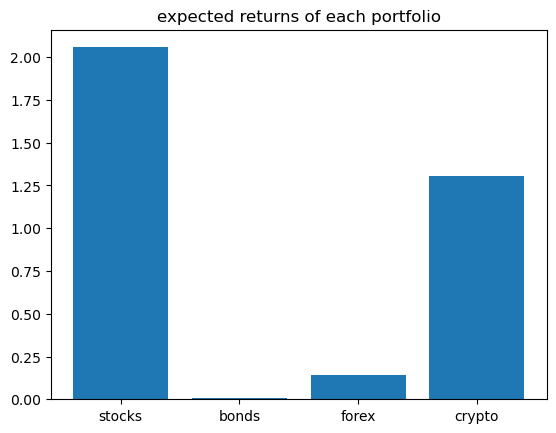

In [4]:
import matplotlib.pyplot as plt
#visuals of expected returns for bonds,stocks, forex market and crypto currency
labels_er = ['stocks','bonds',"forex","crypto"]
values_er = [expected_returns_stock_portfolio,bond_portfolio_expected_returns,forex_portfolio_performance_expected_returns,portfolio_performance_crypto_returns]
plt.bar(labels_er,values_er)
plt.title('expected returns of each portfolio')
plt.show()

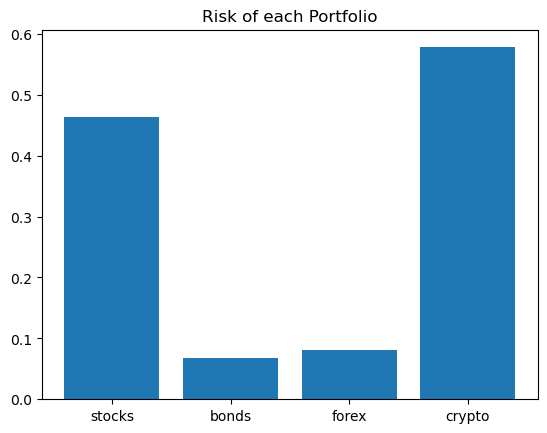

In [5]:
labels_risk = ['stocks','bonds','forex','crypto']
values_risk = [risk_portfolio_performance_stocks,bond_portfolio_risk,forex_portfolio_risk,portfolio_performance_risk_crypto]
plt.bar(labels_risk,values_risk)
plt.title('Risk of each Portfolio')
plt.show()

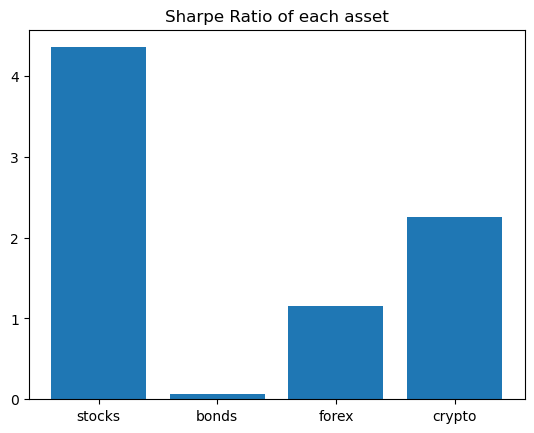

In [6]:
# the sharpe ratios of each asset
labels_sharpe = ["stocks","bonds","forex","crypto"]
values_sharpe = [sharpe_stocks,sharpe_bonds,sharpe_forex,sharpe_crypto]
plt.bar(labels_sharpe,values_sharpe)
plt.title('Sharpe Ratio of each asset')
plt.show()


In [7]:
#full portfolio performance
full_portfolio = pd.concat([stocks_df,bond_df,forex,cyp_tic], axis=1, join='outer')
portfolio_returns = full_portfolio.pct_change().dropna()
print('returns from full portfolio',portfolio_returns)

returns from full portfolio                 AAPL      AMZN         F     GOOGL      MSFT      NFLX  \
Date                                                                     
2023-02-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-02-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-02-06 -0.017929 -0.011703 -0.006803 -0.017942 -0.006116 -0.012080   
2023-02-07  0.019245 -0.000685  0.023592  0.046064  0.042022  0.004067   
2023-02-08 -0.017653 -0.020174 -0.002230 -0.076830 -0.003102  0.010690   
...              ...       ...       ...       ...       ...       ...   
2024-05-09  0.010014  0.007979 -0.001646  0.003424  0.004336  0.004299   
2024-05-10 -0.008235 -0.010660 -0.011542 -0.007708  0.005869 -0.001993   
2024-05-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-05-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-05-13  0.017645 -0.004854  0.028357  0.002905 -0.002459  0.009364   

         

In [8]:
# expected returns full portfolio

mu_full_portfolio = expected_returns.mean_historical_return(full_portfolio)
S_full_portfolio = risk_models.sample_cov(full_portfolio)

#efficient frontier full portfolio

ef_full = EfficientFrontier(mu_full_portfolio,S_full_portfolio)
weights_full = ef_full.max_sharpe()
weights_full_cleaned = ef_full.clean_weights()
print('weights',weights_full_cleaned)

weights OrderedDict([('AAPL', 0.0), ('AMZN', 0.02274), ('F', 0.0), ('GOOGL', 0.0), ('MSFT', 0.0), ('NFLX', 0.0), ('NVDA', 0.17038), ('SBUX', 0.0), ('T', 0.0), ('TGT', 0.0), ('TSLA', 0.0), ('AGG', 0.0), ('BND', 0.0), ('HYG', 0.0), ('IEF', 0.0), ('LQD', 0.0), ('MUB', 0.0), ('SHY', 0.0), ('TIP', 0.0), ('TLT', 0.0), ('AUDUSD=X', 0.0), ('EURGBP=X', 0.0), ('EURUSD=X', 0.0), ('GBPUSD=X', 0.19607), ('JPY=X', 0.52252), ('NZDUSD=X', 0.0), ('USDCAD=X', 0.0), ('USDCHF=X', 0.0), ('ADA-USD', 0.0), ('BCH-USD', 0.00624), ('BTC-USD', 0.01819), ('DOT-USD', 0.0), ('ETH-USD', 0.0), ('LINK-USD', 0.0), ('LTC-USD', 0.0), ('SOL-USD', 0.06385), ('XRP-USD', 0.0)])


In [9]:
#for fun

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

poly_returns = poly.fit_transform(portfolio_returns)
poly_returns_df = pd.DataFrame(poly_returns)
print(poly_returns_df)

     0         1         2         3         4         5         6     \
0     1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     1.0 -0.017929 -0.011703 -0.006803 -0.017942 -0.006116 -0.012080   
3     1.0  0.019245 -0.000685  0.023592  0.046064  0.042022  0.004067   
4     1.0 -0.017653 -0.020174 -0.002230 -0.076830 -0.003102  0.010690   
..    ...       ...       ...       ...       ...       ...       ...   
460   1.0  0.010014  0.007979 -0.001646  0.003424  0.004336  0.004299   
461   1.0 -0.008235 -0.010660 -0.011542 -0.007708  0.005869 -0.001993   
462   1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
463   1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
464   1.0  0.017645 -0.004854  0.028357  0.002905 -0.002459  0.009364   

         7         8         9     ...          9870          9871  \
0    0.000000  0.000000  0.000000  ... -2.497962e-06 

In [10]:
full_portfolio_performance_expected_returns = ef_full.portfolio_performance()[0]
full_portfolio_risk = ef_full.portfolio_performance()[1]


sharpe_full_portfolio = full_portfolio_performance_expected_returns - .05 / full_portfolio_risk


print('expected returns on this massive portfolio',full_portfolio_performance_expected_returns)
print('risk of this massive portfolio',full_portfolio_risk)
print('sharpe ratio of this massive portfolio',sharpe_full_portfolio)

expected returns on this massive portfolio 0.3951212117641083
risk of this massive portfolio 0.09859269598977087
sharpe ratio of this massive portfolio -0.11201574699384642


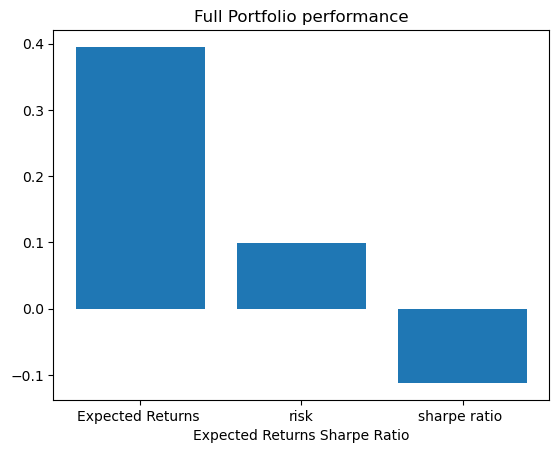

In [11]:
def full_portfolio_plot(full_portfolio_performance_expected_returns,full_portfolio_risk,sharpe_full_portfolio):
    labels = ['Expected Returns ','risk','sharpe ratio ']
    values = [full_portfolio_performance_expected_returns,full_portfolio_risk,sharpe_full_portfolio]
    plt.bar(labels,values)
    plt.title('Full Portfolio performance')
    plt.xlabel('Expected Returns Sharpe Ratio')
    plt.show()



full_portfolio_plot(full_portfolio_performance_expected_returns, full_portfolio_risk, sharpe_full_portfolio)

[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


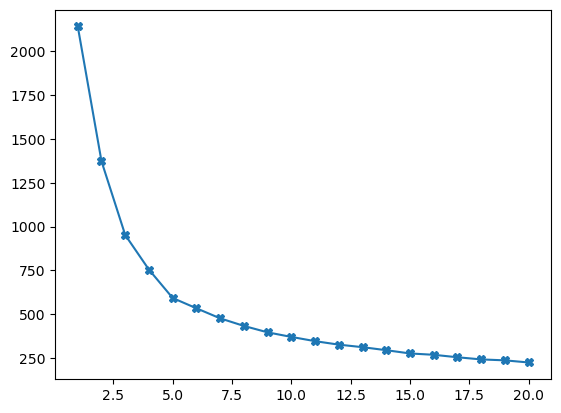

In [12]:
#ok, time to cluster the entire portfolio by any k-means necessary
#clustering full porfolio


df_stocks = yf.download(stock_tickers,start=start_date,end=end_date)
forex_df = yf.download(forex_tickers,start=start_date,end=end_date)
cyp_df = yf.download(tickers=crypto_tickers,start=start_date,end=end_date)
bond = yf.download(tickers=bond_tickers,start=start_date,end=end_date)


full = pd.concat([df_stocks,forex_df,cyp_df,bond],axis=1,join='outer')
full.describe()

X_full = full[['High','Low','Adj Close','Volume']]

X_full.dropna(inplace=True)

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X_full)

from sklearn.cluster import KMeans

cc = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=0).fit(X_scaled)
    cc.append(kmeans.inertia_)




#elbow method
plt.plot(range(1,21),cc,marker='X')
plt.show()

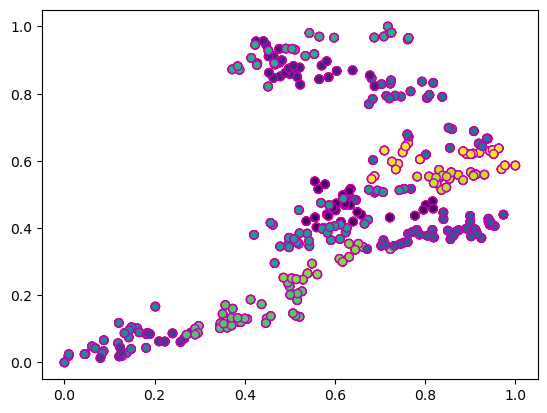

In [13]:
# k = 12

kmeans = KMeans(n_clusters=12,init='k-means++', n_init=20, random_state=1).fit(X_scaled)
labels = kmeans.labels_



X_full['Cluster 1'] = labels
X_full['Cluster 2'] = labels
X_full['Cluster 3'] = labels
X_full['Cluster 4'] = labels


plt.scatter(X_scaled[:,0],X_scaled[:,1],c=X_full['Cluster 1'],edgecolors='r')
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=X_full['Cluster 2'],edgecolors='m')
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=X_full['Cluster 3'],edgecolors='r')
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=X_full['Cluster 4'],edgecolors='m')
plt.show()

In [14]:
#scoring

from sklearn.metrics import silhouette_score

sh = silhouette_score(X_scaled,labels)
print('sh score: ',sh*100)
print(kmeans.inertia_)

sh score:  31.856320012307055
327.9709764316867
